## How Do You Start Machine Learning in Python?

The best way to learn machine learning is by designing and completing small projects.

### Python Can Be Intimidating When Getting Started

Python is a popular and powerful interpreted language. Unlike R, Python is a complete language and platform that you can use for both research and development and developing production systems.

There are also a lot of modules and libraries to choose from, providing multiple ways to do each task. It can feel overwhelming.

The best way to get started using Python for machine learning is to complete a project.

* It will force you to install and start the Python interpreter (at the very least).
* It will given you a bird’s eye view of how to step through a small project.
* It will give you confidence, maybe to go on to your own small projects.

## What are the two main categories of machine learning?

**Supervised learning**: Making predictions using data
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

![Spam filter](images/01_spam_filter.png)

**Unsupervised learning**: Extracting structure from data

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"

![Clustering](images/01_clustering.png)

## How does machine learning "work"?

High-level steps of supervised learning:

1. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

2. Then, make **predictions** on **new data** for which the label is unknown

The primary goal of supervised learning is to build a model that "generalizes": It accurately predicts the **future** rather than the **past**!

## Questions about machine learning

- How do I choose **which attributes** of my data to include in the model?
- How do I choose **which model** to use?
- How do I **optimize** this model for best performance?
- How do I ensure that I'm building a model that will **generalize** to unseen data?
- Can I **estimate** how well my model is likely to perform on unseen data?

### Step-By-Step Tutorial

In this section, we are going to work through a small machine learning project end-to-end.

Here is an overview of what we are going to cover:

1. Loading the dataset.
2. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.
6. Take your time. Work through each step.

Try to type in the commands yourself or copy-and-paste the commands to speed things up.

If you have any questions at all, just ask

### Load tools

In [1]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

###  Load The Data
We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width
- Framed as a **supervised learning** problem: Predict the species of an iris using the measurements
- Famous dataset for machine learning because prediction is **easy**
- Learn more about the iris dataset: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris) or 
[Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

![Iris](images/03_iris.png)

#### Loading the iris dataset into scikit-learn

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
iris = load_iris()

### Summarize The Dataset

Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

#### Types

In [3]:
# Scikit stores things as 'Bunches'
type(iris)

sklearn.utils.Bunch

In [4]:
# check the types of the features and response
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Dimensions of Dataset

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [5]:
# check the shape of the features (first dimension = number of observations, second dimensions = number of features)
print(iris.data.shape)

(150, 4)


In [6]:
# check the shape of the response (single dimension matching the number of observations)
print(iris.target.shape)

(150,)


#### Machine learning terminology

- Each row is an **observation** (also known as: sample, example, instance, record)
- Each column is a **feature** (also known as: predictor, attribute, independent variable, input, regressor, covariate)

- Each value we are predicting is the **response** (also known as: target, outcome, label, dependent variable)
- **Classification** is supervised learning in which the response is categorical
- **Regression** is supervised learning in which the response is ordered and continuous

In [7]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

#### Peek at the Data

It is also always a good idea to actually eyeball your data.

In [8]:
# print the iris data
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
# print the names of the four features
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
# print integers representing the species of each observation
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# print the encoding scheme for species: 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [25]:
# pandas is a library for handling data which treats it like Excel
dataframe = pandas.DataFrame(iris.data, columns=iris.feature_names)
dataframe['class'] = pandas.Series(target)
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [26]:
# descriptions
print(dataframe.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

### Class Distribution

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [27]:
# class distribution
print(dataframe.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


### Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:
    
1. Univariate plots to better understand each attribute.
2. Multivariate plots to better understand the relationships between attributes.

#### Univariate Plots

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

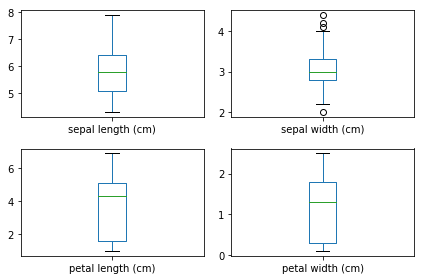

In [36]:
# box and whisker plots
dataframe[iris.feature_names].plot(
    kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

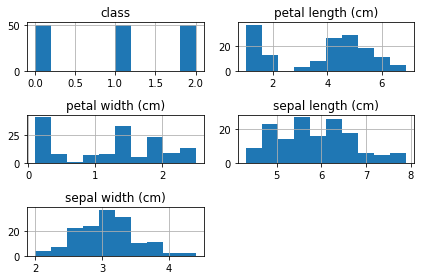

In [41]:
# histograms
dataframe.hist()
plt.tight_layout()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

### Multivariate Plots

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

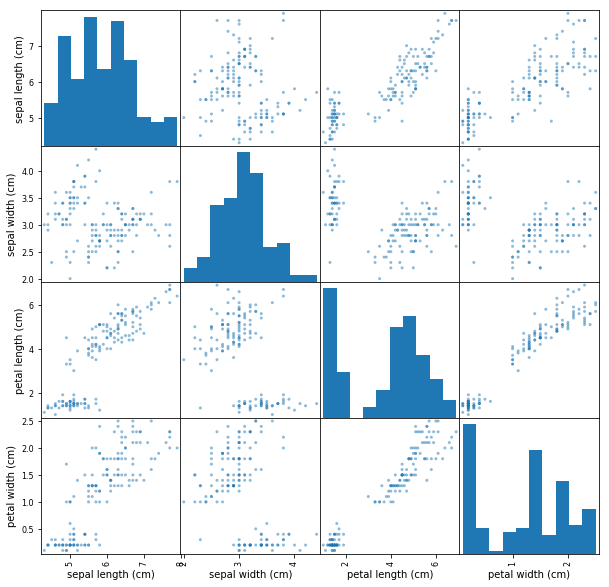

In [47]:
scatter_matrix(dataframe[iris.feature_names], figsize=(10,10));

### Evaluate Some Algorithms

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build 5 different models to predict species from flower measurements
4. Select the best model.

#### Create a Validation Dataset

We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [54]:
validation_size = 0.20
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=validation_size)

You now have training data in the X_train and Y_train for preparing models and a X_test and Y_test sets that we can use later.

#### Testing Setup
We will use "10-fold cross validation" to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

#### Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold cross-validation:**

![5-fold cross-validation](images/07_cross_validation_diagram.png)

In [59]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**
- K can be any number, but **K=10** is generally recommended
- For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

### Build Models

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:
    
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build and evaluate our models:

In [67]:
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(
        model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.055277)
LDA: 0.991667 (0.025000)
KNN: 0.975000 (0.038188)
CART: 0.975000 (0.038188)
NB: 0.958333 (0.041667)
SVM: 0.991667 (0.025000)


### Select Best Model

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

Note, you’re results may differ.

In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

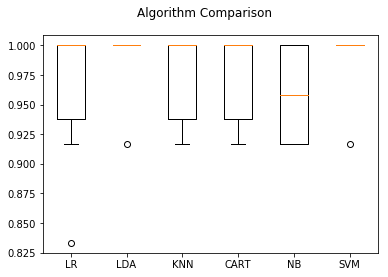

In [72]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Make Predictions

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [77]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.9666666666666667
[[ 5  0  0]
 [ 0  9  1]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.90      0.95        10
           2       0.94      1.00      0.97        15

   micro avg       0.97      0.97      0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

### Conclusions

**You do not need to understand everything.** (at least not right now) Your goal is to run through the tutorial end-to-end and get a result. You do not need to understand everything on the first pass. List down your questions as you go. Make heavy use of the help(“FunctionName”) help syntax in Python to learn about all of the functions that you’re using.

**You do not need to know how the algorithms work.** It is important to know about the limitations and how to configure machine learning algorithms. But learning about algorithms can come later. You need to build up this algorithm knowledge slowly over a long period of time. Today, start off by getting comfortable with the platform.

**You do not need to be a Python programmer.** The syntax of the Python language can be intuitive if you are new to it. Just like other languages, focus on function calls (e.g. function()) and assignments (e.g. a = “b”). This will get you most of the way. You are a developer, you know how to pick up the basics of a language real fast. Just get started and dive into the details later.

**You do not need to be a machine learning expert.** You can learn about the benefits and limitations of various algorithms later, and there are plenty of posts that you can read later to brush up on the steps of a machine learning project and the importance of evaluating accuracy using cross validation.

**What about other steps in a machine learning project.** We did not cover all of the steps in a machine learning project because this is your first project and we need to focus on the key steps. Namely, loading data, looking at the data, evaluating some algorithms and making some predictions. 